In [3]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
od.download("https://www.kaggle.com/datasets/moltean/fruits")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dmukdissanayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/moltean/fruits


100%|██████████| 5.37G/5.37G [01:26<00:00, 66.6MB/s]


In [4]:
!cp -r /content/fruitify_dataset /content/drive/MyDrive/
print("✅ fruitify_dataset saved!")

cp: cannot create symbolic link '/content/drive/MyDrive/fruitify_dataset': Operation not supported
✅ fruitify_dataset saved!


In [5]:
# ======================================
# FRUITIFY - IMPLEMENTATION 1
# Baseline CNN Model
# ======================================

# 1. Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# 2. Copy organized dataset from Drive to Colab
!cp -r /content/drive/MyDrive/fruitify_dataset /content/

# 3. Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# 4. Set paths and parameters
train_dir = '/content/fruitify_dataset/train'
test_dir = '/content/fruitify_dataset/test'
IMG_SIZE = 100
BATCH_SIZE = 32
NUM_CLASSES = 10

# 5. Verify dataset is loaded
print("\n📁 Training folders:")
print(os.listdir(train_dir)[:5])
print(f"\nTotal training images: {sum(len(os.listdir(os.path.join(train_dir, f))) for f in os.listdir(train_dir))}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📁 Training folders:
['Apple', 'Banana', 'Grape', 'Mango', 'Orange']

Total training images: 5068


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


fruit_classes = ['Apple', 'Banana', 'Grape', 'Mango', 'Orange',
                 'Peach', 'Pear', 'Pineapple', 'Strawberry', 'Watermelon']

print("🍎 Using these classes:", fruit_classes)

# Create generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(
    '/content/fruitify_dataset/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=fruit_classes,  # 👈 THIS IS THE KEY!
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    '/content/fruitify_dataset/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=fruit_classes,  # 👈 Force only fruit classes
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    '/content/fruitify_dataset/test',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=fruit_classes,  # 👈 Force only fruit classes
    shuffle=False
)

print(f"\n✅ Training samples: {train_data.samples}")
print(f"✅ Validation samples: {val_data.samples}")
print(f"✅ Test samples: {test_data.samples}")
print(f"✅ Classes: {list(train_data.class_indices.keys())}")

🍎 Using these classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Strawberry', 'Watermelon']
Found 4058 images belonging to 10 classes.
Found 1010 images belonging to 10 classes.
Found 1693 images belonging to 10 classes.

✅ Training samples: 4058
✅ Validation samples: 1010
✅ Test samples: 1693
✅ Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Strawberry', 'Watermelon']


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,066 (6.61 MB)

 Trainable params: 1,733,066 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    verbose=1
    )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 3879s 31s/step - accuracy: 0.5651 - loss: 1.1708 - val_accuracy: 0.9851 - val_loss: 0.0328
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9879 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9889 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9910 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 9.7865e-05
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9965 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9930 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 4.1989e-04
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9858 - loss: 0.0551 - val_accuracy: 1.0000 - val_loss: 1.6559e-05
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.99

✅ Model saved to Drive!
✅ Training graphs saved to Drive!
53/53 ━━━━━━━━━━━━━━━━━━━━ 1557s 30s/step - accuracy: 1.0000 - loss: 7.2566e-07

🎯 Final Test Accuracy: 1.0000
Test Loss: 0.0000

✅ All results saved to Google Drive!


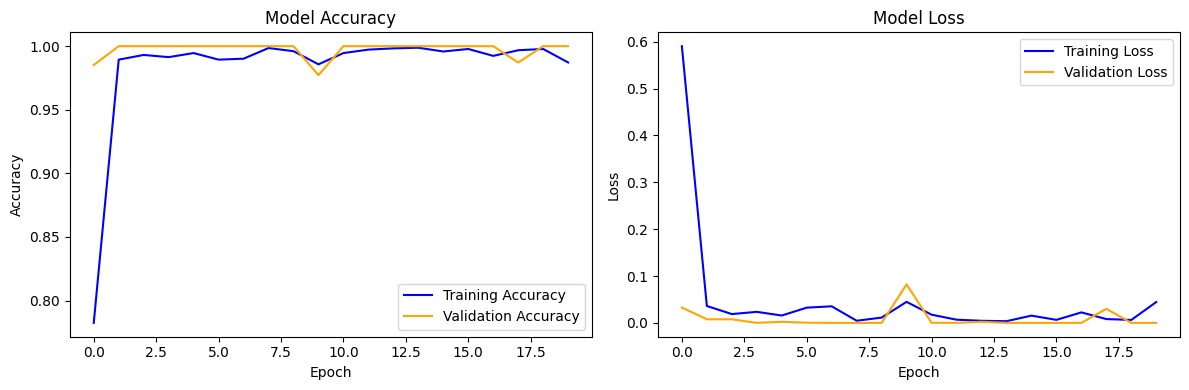

In [10]:
# ======================================
# SAVE ALL RESULTS TO GOOGLE DRIVE
# ======================================

# 1. Save the model
model.save('/content/drive/MyDrive/fruitify_model_v1.h5')
print("✅ Model saved to Drive!")

# 2. Save the graphs
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/training_history.png')
print("✅ Training graphs saved to Drive!")

# 3. Save final accuracy numbers
test_loss, test_acc = model.evaluate(test_data)
print(f"\n🎯 Final Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 4. Save results to text file
with open('/content/drive/MyDrive/implementation1_results.txt', 'w') as f:
    f.write("FRUITIFY IMPLEMENTATION 1 RESULTS\n")
    f.write("="*40 + "\n")
    f.write(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}\n")
    f.write(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}\n")
    f.write(f"Test Accuracy: {test_acc:.4f}\n")
    f.write(f"Test Loss: {test_loss:.4f}\n")

print("\n✅ All results saved to Google Drive!")

53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 1.0000 - loss: 7.2566e-07

🎯 Test Accuracy: 1.0000
Test Loss: 0.0000


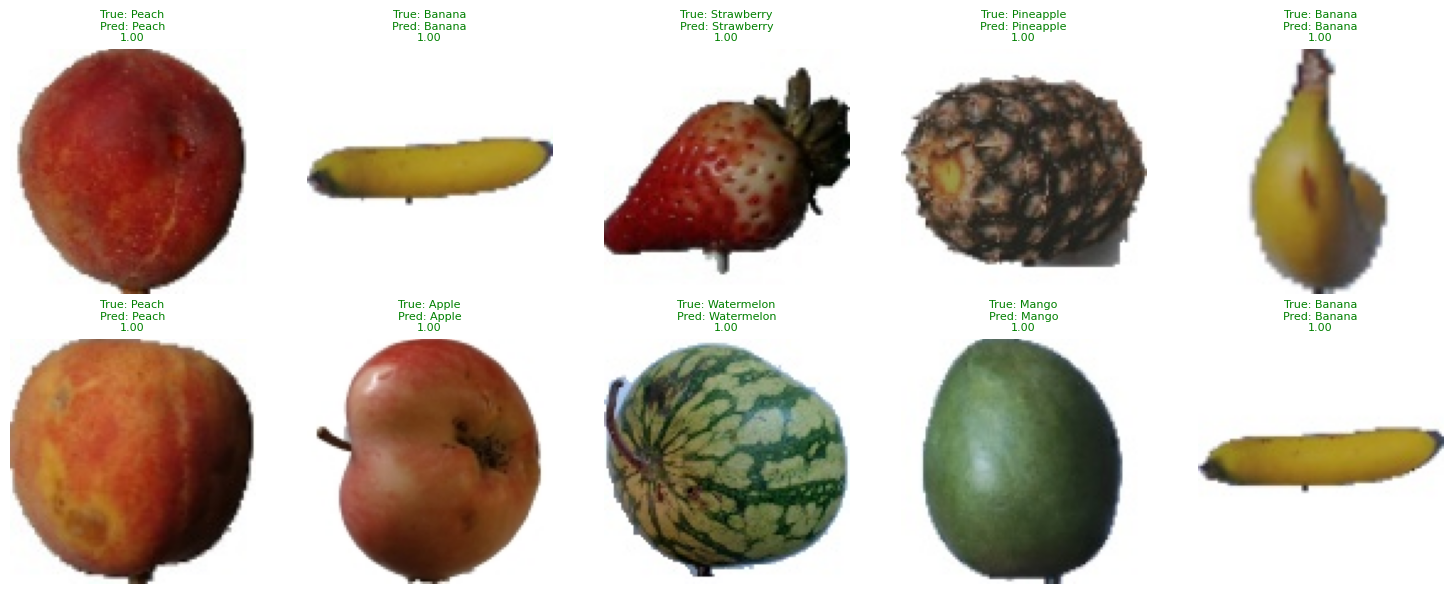

✅ Sample predictions saved to Drive!


In [11]:
# ======================================
# EVALUATE ON TEST DATA & SHOW PREDICTIONS
# ======================================

# 1. Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Save results to file
with open('/content/drive/MyDrive/test_results.txt', 'w') as f:
    f.write(f"Test Accuracy: {test_acc:.4f}\n")
    f.write(f"Test Loss: {test_loss:.4f}\n")

# 2. Show sample predictions
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Get class names
class_names = list(train_data.class_indices.keys())

# Display 10 random test images with predictions
plt.figure(figsize=(15, 6))

for i in range(10):
    # Get random image from test folder
    fruit = random.choice(class_names)
    fruit_folder = os.path.join(test_dir, fruit)
    img_file = random.choice(os.listdir(fruit_folder))
    img_path = os.path.join(fruit_folder, img_file)

    # Load and predict
    img = plt.imread(img_path)
    img_resized = tf.image.resize(img, (100, 100)) / 255.0

    prediction = model.predict(img_resized.numpy().reshape(1, 100, 100, 3), verbose=0)
    pred_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Display
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    color = 'green' if pred_class == fruit else 'red'
    plt.title(f"True: {fruit}\nPred: {pred_class}\n{confidence:.2f}", color=color, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/sample_predictions.png')
plt.show()
print("✅ Sample predictions saved to Drive!")

🍎 ALL 10 FRUIT CLASSES:
  1. Apple
  2. Banana
  3. Grape
  4. Mango
  5. Orange
  6. Peach
  7. Pear
  8. Pineapple
  9. Strawberry
  10. Watermelon


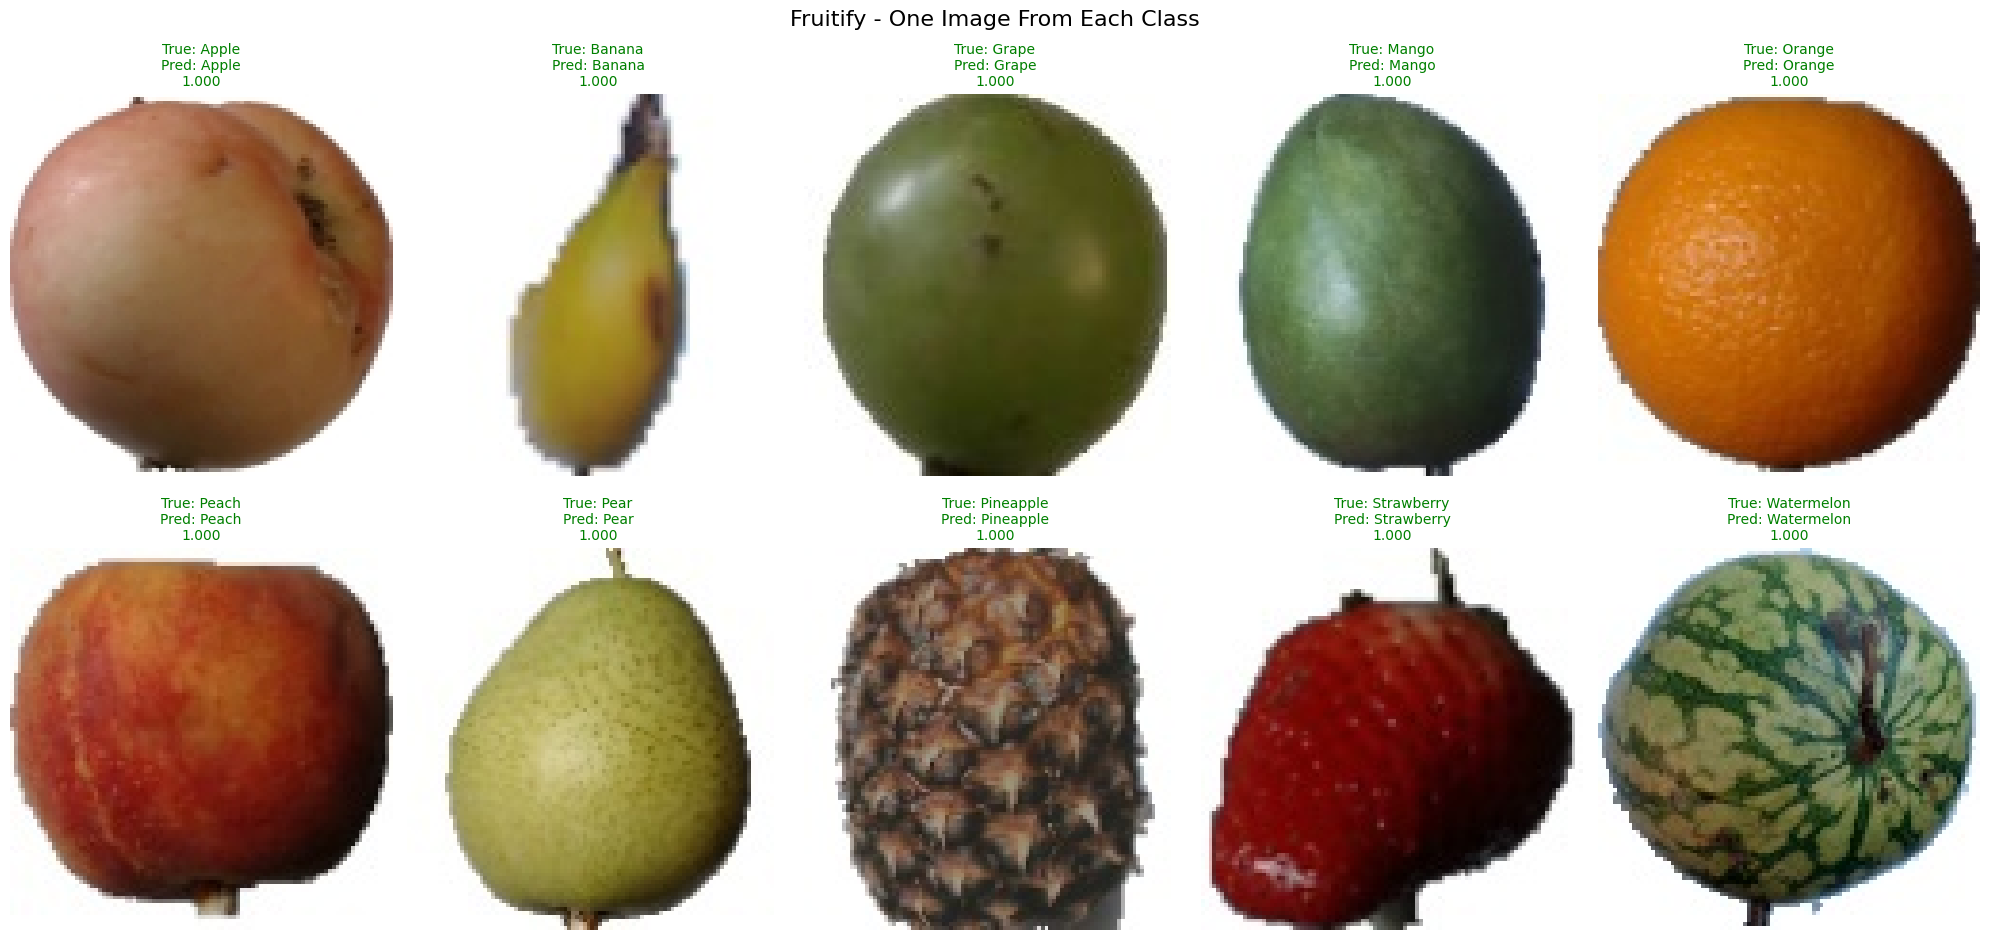


✅ Saved to Drive: all_10_fruits.png
✅ This shows ALL 10 fruits - one from each class!


In [12]:
# ======================================
# SHOW ONE IMAGE FROM EACH FRUIT CLASS
# ======================================

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# Get all 10 class names in order
class_names = sorted(list(train_data.class_indices.keys()))
print("🍎 ALL 10 FRUIT CLASSES:")
for i, fruit in enumerate(class_names):
    print(f"  {i+1}. {fruit}")

# Create figure
plt.figure(figsize=(20, 10))

# Take ONE image from EACH class
for i, fruit in enumerate(class_names):
    # Get one random image from this specific fruit's folder
    fruit_folder = os.path.join(test_dir, fruit)
    all_images = os.listdir(fruit_folder)
    img_file = np.random.choice(all_images)  # Random image from this fruit
    img_path = os.path.join(fruit_folder, img_file)

    # Load and predict
    img = plt.imread(img_path)
    img_resized = tf.image.resize(img, (100, 100)) / 255.0

    prediction = model.predict(img_resized.numpy().reshape(1, 100, 100, 3), verbose=0)
    pred_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Display
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    color = 'green' if pred_class == fruit else 'red'
    plt.title(f"True: {fruit}\nPred: {pred_class}\n{confidence:.3f}",
              color=color, fontsize=10)
    plt.axis('off')

plt.suptitle("Fruitify - One Image From Each Class", fontsize=16)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/all_10_fruits.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Saved to Drive: all_10_fruits.png")
print("✅ This shows ALL 10 fruits - one from each class!")